In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [31]:
df_train =pd.read_csv('dataSantander.csv')
df_train 

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [32]:
X=df_train.drop(['ID_code','target'], axis=1)
y=df_train['target']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [33]:
model=GradientBoostingClassifier(n_estimators=5000,
                                learning_rate=0.05,
                                max_depth=3,
                                subsample=0.5,
                                validation_fraction=0.1,
                                n_iter_no_change=20,
                                max_features='log2',
                                verbose=1)
model.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6474           0.0016           20.33m
         2           0.6453           0.0013           19.45m
         3           0.6402           0.0011           18.04m
         4           0.6470           0.0012           17.17m
         5           0.6420           0.0009           17.58m
         6           0.6410           0.0009           17.00m
         7           0.6457           0.0010           16.81m
         8           0.6382           0.0008           16.83m
         9           0.6379           0.0008           16.96m
        10           0.6429           0.0008           17.08m
        20           0.6339           0.0009           18.89m
        30           0.6199           0.0010           19.64m
        40           0.6053           0.0008           19.37m
        50           0.6002           0.0007           18.89m
        60           0.5907           0.0008           18.48m
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

In [35]:
len(model.estimators_)

1666

In [36]:
model.score(X_test,y_test)

0.92235

In [39]:
y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.9291
AUC Valid: 0.8934


In [40]:
y_train_pred_trees = np.stack(list(model.staged_predict_proba(X_train)))[:,:,1]
y_valid_pred_trees = np.stack(list(model.staged_predict_proba(X_test)))[:,:,1]

y_train_pred_trees.shape, y_valid_pred_trees.shape

((1666, 160000), (1666, 40000))

In [43]:
auc_train_trees = [roc_auc_score(y_train, y_pred) for y_pred in y_train_pred_trees]
auc_valid_trees = [roc_auc_score(y_test, y_pred) for y_pred in y_valid_pred_trees]

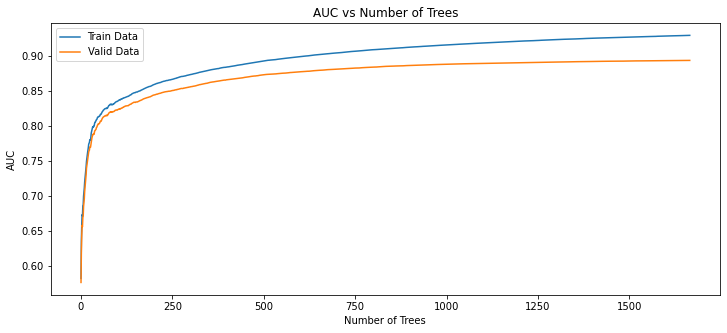

In [44]:
plt.figure(figsize=(12,5))

plt.plot(auc_train_trees, label='Train Data')
plt.plot(auc_valid_trees, label='Valid Data')

plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()

plt.show()

In [47]:
var_columns = [c for c in df_train.columns if c not in ['ID_code','target']]
pd.DataFrame({"Variable_Name":var_columns,
              "Importance":model.feature_importances_}) \
            .sort_values('Importance', ascending=False)

,Variable_Name,Importance
81,var_81,0.030429
12,var_12,0.020920
139,var_139,0.019704
53,var_53,0.017537
146,var_146,0.017359
...,...,...
158,var_158,0.000393
17,var_17,0.000380
38,var_38,0.000364
10,var_10,0.000362
